In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,Input
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [3]:
X_train = X_train / 255.0  # pixels are in the range of (0,255)
X_test = X_test / 255.0
y_train = to_categorical(y_train, 10)  # One-hot encode the labels
y_test = to_categorical(y_test, 10)

In [4]:
print(f"Shape of the X_train set is {X_train.shape}")
print(f"Shape of the y_train set is {y_train.shape}")
print(f"Shape of the X_test set is {X_test.shape}")
print(f"Shape of the y_test set is {y_test.shape}")

Shape of the X_train set is (60000, 28, 28)
Shape of the y_train set is (60000, 10)
Shape of the X_test set is (10000, 28, 28)
Shape of the y_test set is (10000, 10)


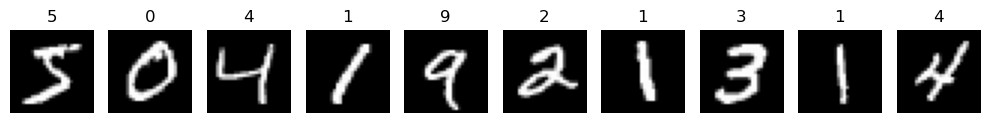

In [5]:
plt.figure(figsize = (10,2))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X_train[i],cmap = 'gray')
    plt.title(str(np.where(y_train[i] == 1))[8])
    plt.axis("off")
    plt.tight_layout()

In [6]:
mnist_nn = Sequential([     # neural network instance
    Input(shape =(28, 28)),# 28x28 images to 784 input features
    Flatten(),
    Dense(128, activation='relu'),     # Hidden layer with 128 neurons
    Dense(10, activation='softmax')    # Output layer for 10 classes
])

In [7]:
mnist_nn.compile(   # compilation of the neural network
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
mnist_nn.fit(X_train, y_train, epochs=10, batch_size=32) # Set the hyparameters to increase accuracy

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9249 - loss: 0.2624
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9656 - loss: 0.1151
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9755 - loss: 0.0799
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9819 - loss: 0.0589
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9866 - loss: 0.0440
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9886 - loss: 0.0359
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9921 - loss: 0.0270
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9930 - loss: 0.0222
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9945 - loss: 0.0173
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9949 - loss: 0.0160


In [9]:
test_loss, test_acc = mnist_nn.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc*100:.2f}%")   # Test accuracy upto 2 floating points

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9795 - loss: 0.0788
Test accuracy: 97.95%
